# **LINEAR REGRESSION**
On Housing Price Predicitation Dataset


In [56]:
#loading the dataset
import pandas as pd
from google.colab import files

ab = files.upload()

Saving Housing.csv to Housing (2).csv


In [57]:
df = pd.read_csv('Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [58]:
#Insight details of the dataset
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [59]:
#checking null values
df.isnull().sum()

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


In [60]:
# Checking Duplicate values
df.duplicated().sum()

np.int64(0)

In [64]:
#Renameing columns
df.rename(columns={
    "furnishingstatus": "Furnishing_Status",
}, inplace=True)
df.rename(columns={"Price": "Salesprice"
}, inplace=True)


In [62]:
df.columns=df.columns.str.capitalize()

In [65]:
df['Mainroad'] = df['Mainroad'].str.capitalize()
df['Guestroom'] = df['Guestroom'].str.capitalize()
df['Basement'] = df['Basement'].str.capitalize()
df['Hotwaterheating'] = df['Hotwaterheating'].str.capitalize()
df['Airconditioning'] = df['Airconditioning'].str.capitalize()
df['Prefarea'] = df['Prefarea'].str.capitalize()
df['Furnishing_status']=df['Furnishing_status'].str.capitalize()

In [66]:
df.head()

,Salesprice,Area,Bedrooms,Bathrooms,Stories,Mainroad,Guestroom,Basement,Hotwaterheating,Airconditioning,Parking,Prefarea,Furnishing_status
0,13300000,7420,4,2,3,Yes,No,No,No,Yes,2,Yes,Furnished
1,12250000,8960,4,4,4,Yes,No,No,No,Yes,3,No,Furnished
2,12250000,9960,3,2,2,Yes,No,Yes,No,No,2,Yes,Semi-furnished
3,12215000,7500,4,2,2,Yes,No,Yes,No,Yes,3,Yes,Furnished
4,11410000,7420,4,1,2,Yes,Yes,Yes,No,Yes,2,No,Furnished


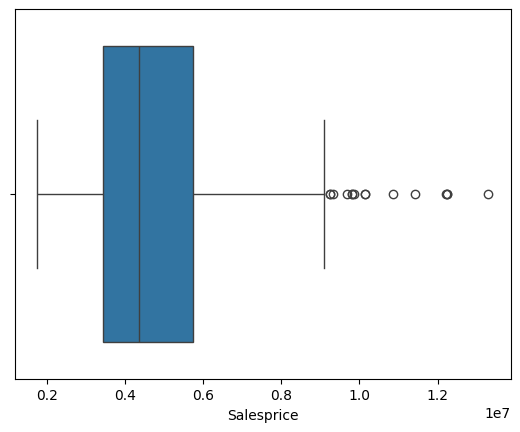

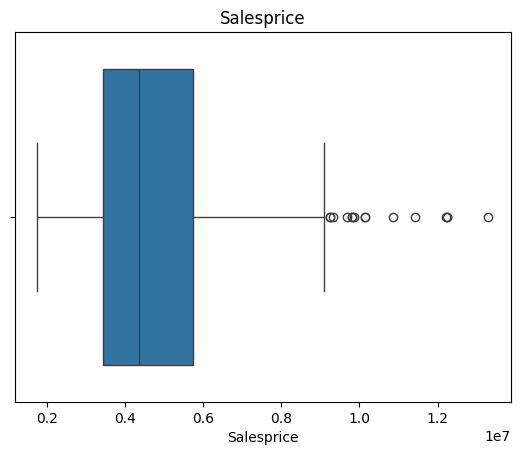

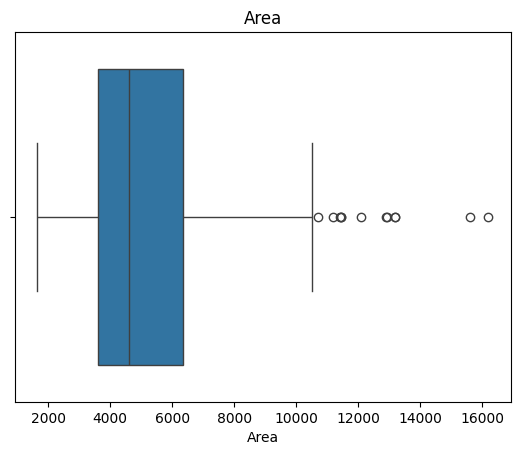

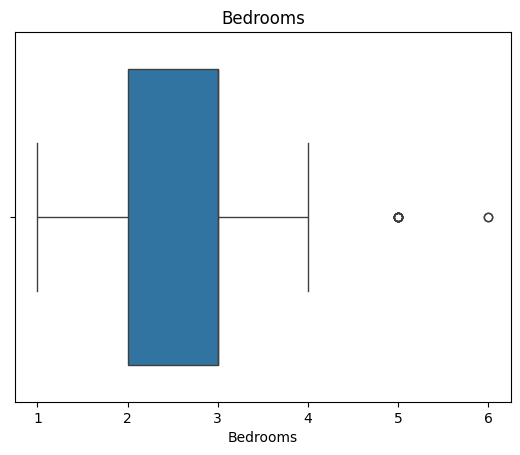

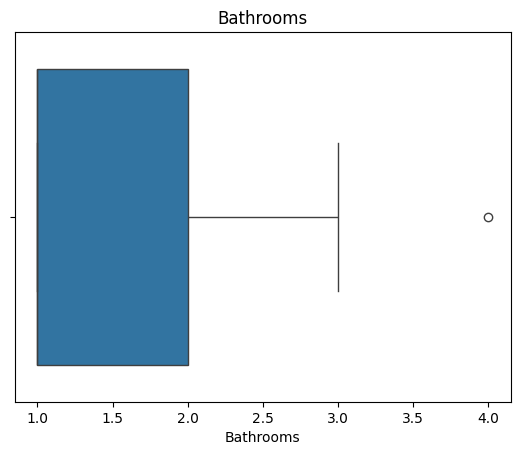

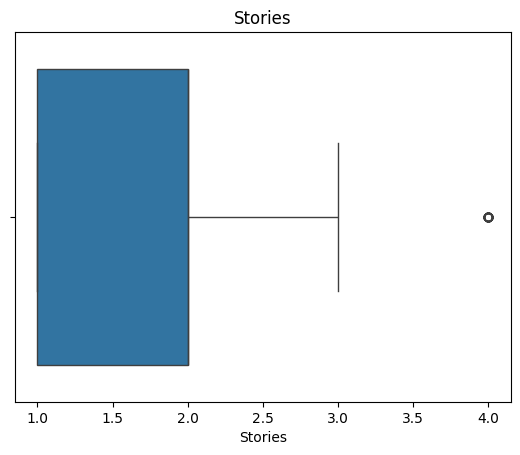

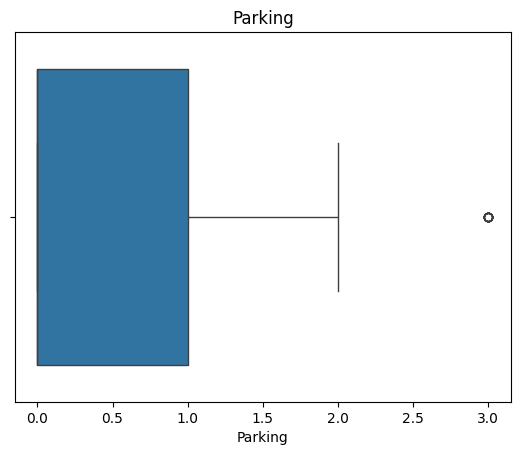

In [67]:
#outiler detection and ploting boxplot
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df['Salesprice'])
plt.show()

numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in numeric_cols:
    sns.boxplot(x=df[col])
    plt.title(col)
    plt.show()


In [68]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

df = pd.get_dummies(df, drop_first=True)

X = df.drop("Salesprice", axis=1)
y = df["Salesprice"]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [69]:
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Split data into train-test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)



In [70]:
# Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Model Evaluation:")
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")


Model Evaluation:
MAE: 970043.403920164
MSE: 1754318687330.6675
RMSE: 1324506.96009144
R²: 0.6529242642153177



Model Coefficients:
                             Feature    Coefficient
2                          Bathrooms  549420.501241
0                               Area  511615.563777
9                Airconditioning_Yes  367817.894916
3                            Stories  353158.429856
10                      Prefarea_Yes  267018.660812
4                            Parking  193542.781675
7                       Basement_Yes  186194.150506
8                Hotwaterheating_Yes  143233.206250
5                       Mainroad_Yes  128151.921295
6                      Guestroom_Yes   88590.213462
1                           Bedrooms   56615.572458
11  Furnishing_status_Semi-furnished  -62550.297211
12     Furnishing_status_Unfurnished -193987.781088


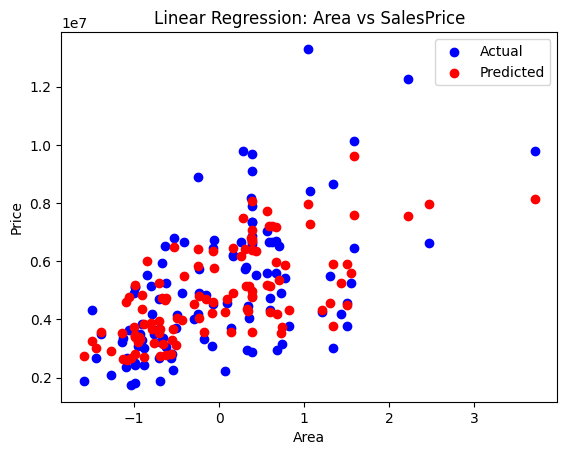

In [71]:
#Interpret coefficients
coefficients = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
}).sort_values(by="Coefficient", ascending=False)

print("\nModel Coefficients:")
print(coefficients)

# Plot regression line for one feature
if 'Area' in X.columns:
    plt.scatter(X_test[:, X.columns.get_loc('Area')], y_test, color='blue', label='Actual')
    plt.scatter(X_test[:, X.columns.get_loc('Area')], y_pred, color='red', label='Predicted')
    plt.xlabel('Area')
    plt.ylabel('Price')
    plt.title('Linear Regression: Area vs SalesPrice')
    plt.legend()
    plt.show()

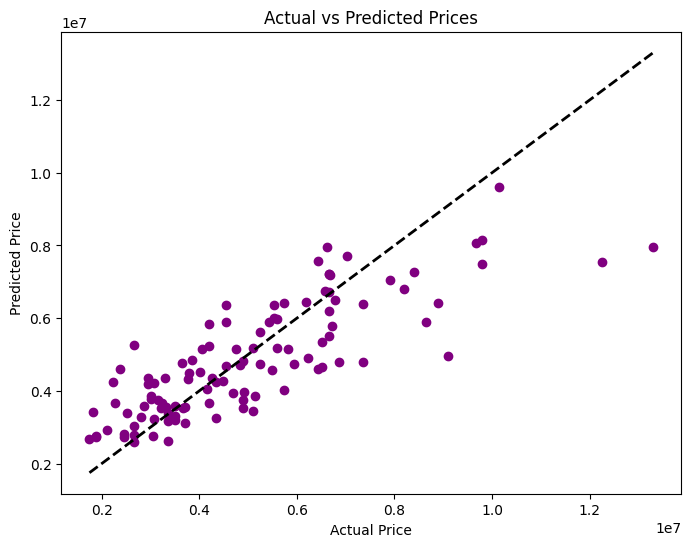

In [72]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='purple')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Prices')
plt.show()


In [73]:
df.head()

,Salesprice,Area,Bedrooms,Bathrooms,Stories,Parking,Mainroad_Yes,Guestroom_Yes,Basement_Yes,Hotwaterheating_Yes,Airconditioning_Yes,Prefarea_Yes,Furnishing_status_Semi-furnished,Furnishing_status_Unfurnished
0,13300000,7420,4,2,3,2,True,False,False,False,True,True,False,False
1,12250000,8960,4,4,4,3,True,False,False,False,True,False,False,False
2,12250000,9960,3,2,2,2,True,False,True,False,False,True,True,False
3,12215000,7500,4,2,2,3,True,False,True,False,True,True,False,False
4,11410000,7420,4,1,2,2,True,True,True,False,True,False,False,False


In [74]:
#df.to_csv("cleaned_housing.csv", index=False) "allows to save saved the processed dataset"